# Pulizia Dati Dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
import matplotlib.pyplot as plt

dtFlorence = pd.DataFrame(pd.read_csv("florence.csv"))

In [55]:
def datasetsFeatureFiltration(dataset):
    #######caratteristiche strutturali############
    #######caratteristiche non strutturali############
    dataset = dataset[['amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights',
                    'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                    'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating',
                    'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication',
                    'review_scores_location','review_scores_value', 'license', 'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                    'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
                    'bathrooms_text', 'bedrooms', 'beds', 'price']]
    return dataset

def cleanBedsAndBedrooms(dataset):
    #Nella colonna bedrooms rimpiazzo NAN con 1.0, ipotizzando che se il numero di camere da letto non è specificato allora sia di default 1
    dataset['bedrooms'] = dataset['bedrooms'].fillna(1.0)

    #Nella colonna beds rimpiazzo NAN con 1.0, ipotizzando che se il numero di letti non è specificato allora sia di default 1
    dataset['beds'] = dataset['beds'].fillna(1.0)
    return dataset

def showDensityPlot(dataset, nome_colonna):
    df = dataset[nome_colonna]

    plt.figure(figsize=(10, 5))

    x = range(min(df),max(df), int((max(df)-min(df))/10))
    plt.title('Density Plot')

    plt.xlabel('Valori')

    plt.ylabel('Densità')

    df.plot(kind='density')

    plt.xticks(x)
    plt.show()

def showHistogram(dataset, column_name):
    plt.figure(figsize=(10, 5))
    plt.hist(dataset[column_name], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


def to_numericColumn(dataset, nome_colonna):
    colonna = dataset[nome_colonna]
    colonna_pulita = colonna.apply(lambda x: re.sub(r'[^0-9.]', '', x).replace(',', '.'))
    colonna_numerica = pd.to_numeric(colonna_pulita, errors='coerce')
    dataset[nome_colonna] = colonna_numerica
    return dataset
    
def replaceNaNWithMedian(dataset, nome_colonna):
    medianVal = dataset[nome_colonna].median()
    dataset[nome_colonna].fillna(value=medianVal, inplace=True)
    return dataset

def replaceNaNWithMode(dataset, nome_colonna):
    modeVal = dataset[nome_colonna].mode()[0]
    dataset[nome_colonna].fillna(value=modeVal, inplace=True)
    print(dataset[nome_colonna].isna().sum())
    return dataset


In [56]:
dtFlorence = datasetsFeatureFiltration(dtFlorence)
dtFlorence = to_numericColumn(dtFlorence, 'price')
dtFlorence = cleanBedsAndBedrooms(dtFlorence)

In [57]:
dtFlorence.loc[dtFlorence['number_of_reviews'] == 0].count()
dtFlorence['review_scores_rating'].loc[dtFlorence['review_scores_rating'].isna()].count()


0

In [58]:
arr = ['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

for i in arr:
       dtFlorence.loc[dtFlorence['number_of_reviews'] == 0, i] = 0

for i in arr:
       dtFlorence = replaceNaNWithMedian(dtFlorence, i)



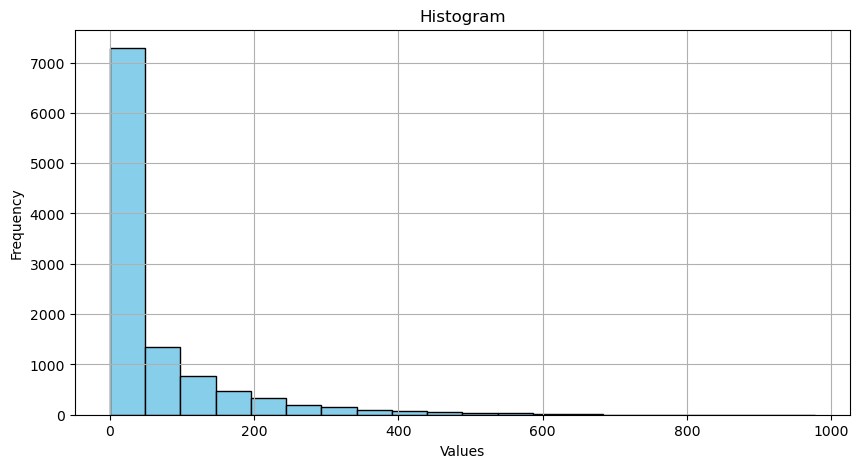

In [59]:
showHistogram(dtFlorence, "number_of_reviews")

In [60]:
dtFlorence['license'].loc[~dtFlorence['license'].isnull()] = True
dtFlorence['license'] = dtFlorence['license'].fillna(False)

C:\Users\AndreaB\AppData\Local\Temp\ipykernel_21100\2033206614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtFlorence['license'].loc[~dtFlorence['license'].isnull()] = True


In [61]:
dtFlorence = replaceNaNWithMode(dtFlorence, 'neighbourhood')
dtFlorence['neighbourhood_group_cleansed'] = dtFlorence['neighbourhood_group_cleansed'].fillna('Terraferma')

#fai un drop della colonna bathrooms perchè tutti nan in tutti i datasets
dtFlorence.drop(['bathrooms'], axis=1, inplace=True)
dtFlorence = replaceNaNWithMode(dtFlorence, 'bathrooms_text')
dtFlorence.isna().sum()

0
0


amenities                       0
minimum_nights                  0
maximum_nights                  0
minimum_minimum_nights          0
maximum_minimum_nights          0
minimum_maximum_nights          0
maximum_maximum_nights          0
minimum_nights_avg_ntm          0
maximum_nights_avg_ntm          0
number_of_reviews               0
number_of_reviews_ltm           0
number_of_reviews_l30d          0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
license                         0
neighbourhood                   0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                  0
bedrooms      

# **Uniformo e pulisco la colonna bathrooms_text**



In [62]:
#dataset['neighbourhood'] = dataset['neighbourhood'].astype('string') RIVEDI!
dtFlorence['bathrooms_text'].loc[dtFlorence['bathrooms_text'] == '0 baths'].count()
dtFlorence.bathrooms_text.unique()

array(['1 bath', '3 baths', '1 private bath', '2 baths', '1 shared bath',
       '4 baths', '2 shared baths', '2.5 baths', '1.5 baths', '5 baths',
       '6 baths', 'Shared half-bath', '3.5 baths', '1.5 shared baths',
       'Half-bath', '0 baths', '6.5 baths', '8 baths', '3 shared baths',
       '7 baths', '9 baths', '4.5 baths', '0 shared baths', '5.5 baths',
       '2.5 shared baths', '7.5 baths', '13 baths', '13.5 baths'],
      dtype=object)

In [63]:
import re

def uniformize_bath(value):
    if not isinstance(value, str):
        value = str(value)
    # Cerca il numero nel testo
    match = re.search(r'(\d+\.?\d*)', value)
    
    # Se non viene trovato nessun numero o il numero è 0, restituisci "1" con il termine corretto
    if not match or float(match.group(1)) == 0:
        if re.search(r'shared|shared (half-)?bath?s?', value):
            return '1 shared'
        elif re.search(r'(private\s)?(half-)?bath?s?', value):
            return '1 bath'
    else:
        # Altrimenti, restituisci il numero trovato insieme al termine corretto
        num = match.group(1)
        if re.search(r'shared (half-)?bath?s?', value):
            return f"{num} shared"

        elif re.search(r'(private\s)?(half-)?bath?s?', value):
            return f"{num} bath"

inputsFlorence = dtFlorence['bathrooms_text']
valuesFlorence = []
for input_value in inputsFlorence:
    valuesFlorence.append(uniformize_bath(input_value))
dtFlorence['bathrooms_text'] = valuesFlorence
dtFlorence.bathrooms_text.unique()


array(['1 bath', '3 bath', '2 bath', '1 shared', '4 bath', '2 shared',
       '2.5 bath', '1.5 bath', '5 bath', '6 bath', '3.5 bath',
       '1.5 shared', '6.5 bath', '8 bath', '3 shared', '7 bath', '9 bath',
       '4.5 bath', '5.5 bath', '2.5 shared', '7.5 bath', '13 bath',
       '13.5 bath'], dtype=object)

In [64]:
def privateSharedBaths(dataset):
    #Divido i bagni in due colonne, una private dove ci saranno solo i bagni non in comune
    #e una colonna shared dove ci saranno solo i bagni in comune

    subset_shared = dataset[dataset["bathrooms_text"].str.contains("shared")]
    dataset["shared_bath"] = subset_shared["bathrooms_text"]

    subset_private = dataset[~ dataset["bathrooms_text"].str.contains("shared")]
    dataset["private_bath"] = subset_private["bathrooms_text"]

    #Adesso sostituisco i valori NA con 0
    dataset['shared_bath'] = dataset['shared_bath'].fillna("0")
    dataset['private_bath'] = dataset['private_bath'].fillna("0")

    #Elimino tutti i caratteri che non siano numeri
    dataset['shared_bath'] = dataset['shared_bath'].str.replace('shared', '')

    dataset['private_bath'] = dataset['private_bath'].str.replace('bath', '')

    #Converto in numero
    dataset['shared_bath'] = pd.to_numeric(dataset['shared_bath'])
    dataset['private_bath'] = pd.to_numeric(dataset['private_bath'])

    #Elimino la colonna bathrooms_text
    dataset.drop(['bathrooms_text'], inplace=True, axis=1)

In [65]:
privateSharedBaths(dtFlorence)


In [66]:
#shared_bath 1.5 --> 37 | 2.5--> 3 totale --> 40
#private_bath totale valori con virgola --> 610
#totale righe con virgola --> 650 
# Specifica i valori che desideri cercare

valori_specifici = [1.5, 2.5, 3.5, 6.5, 4.5, 5.5, 7.5, 13.5]
 
# Stampa le righe che hanno i valori specificati in una determinata colonna (ad esempio 'colonna_da_cercare')
#dtFlorence.loc[dtFlorence['shared_bath'].isin(valori_specifici)]
 
#print(righe_specifiche)

# **Uniformo e pulisco la colonna propetry_type**


In [67]:
def property_type_to_label(dataset):
    unique_elements=[]
    for property in dataset['property_type'].unique():
        unique_elements += [property]
    

    dtProprietyType=pd.Series(data=unique_elements) #Creo una Series in cui il valore di ogni tipo di proprietà è rappresentato dall'indice (Es: Entire rental unit avrà valore 0)

    #Ora devo sostituire nel dataset i vari tipi di proprietà da stringa a numeri (0,1,2...57)
    rangeList=list(range(0,dtProprietyType.count())) #lista con i numeri da 0...57
    i=0

    for property in dtProprietyType:
        dataset['property_type'] = dataset['property_type'].replace(property,rangeList[i])
        i+=1
        
    dataset['property_type'] = dataset['property_type'].astype(int)


In [68]:
property_type_to_label(dtFlorence)


# **Uniformo e pulisco la colonna room_type**
Valori nella colonna solo 4 e uguali per ogni dataset:
<ol>
    <li>Entire home/apt </li>
    <li>Hotel room </li>
    <li>Private room </li>
    <li> Shared room </li>
</ol>

In [69]:
def room_type_to_label(dataset):
    unique_roomtype=[]

    for room in dataset['room_type'].unique():
        unique_roomtype += [room]
    

    dtRoomType=pd.Series(data=unique_roomtype) #Creo una Series in cui il valore di ogni tipo di proprietà è rappresentato dall'indice

    #Ora devo sostituire nel dataset i vari tipi di room_Type da stringa a numeri (0,1,2...57)
    rangeList=list(range(0,dtRoomType.count())) #lista con i numeri da 0...3
    i=0

    for room in dtRoomType:
        dataset['room_type'] = dataset['room_type'].replace(room,rangeList[i])
        i+=1

    dataset['room_type'] = dataset['room_type'].astype(int)

In [70]:
room_type_to_label(dtFlorence)


In [71]:
showDensityPlot(dtFlorence, 'property_type')

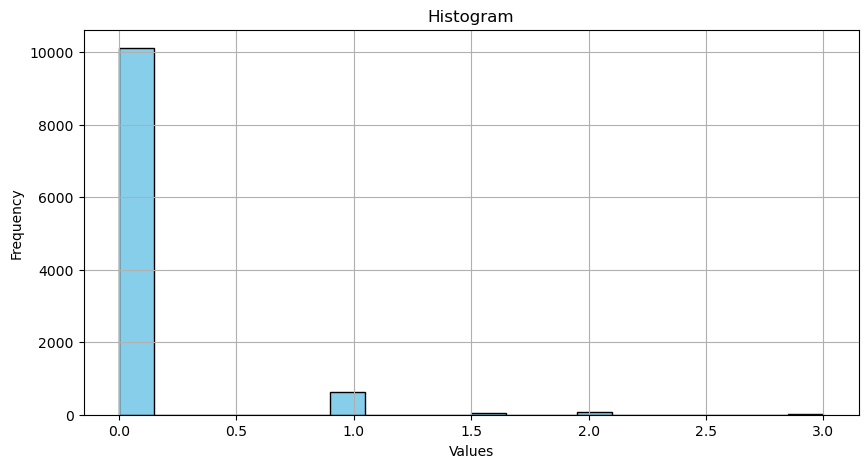

In [73]:
showHistogram(dtFlorence, 'shared_bath')

## Pulizia e sostituzione colonna 'amenities'

In [74]:
def pulisci_parola(word, replacements):
  """
  Pulisce una parola applicando le sostituzioni specificate nel dizionario.

  Args:
    word: La parola da pulire.
    replacements: Un dizionario che mappa le parole da cercare alle parole di sostituzione.

  Returns:
    La parola pulita.
  """
  for pattern, replacement in replacements.items():
    word = re.sub(pattern, replacement, word, flags=re.IGNORECASE)
  return word

In [75]:

#Tutte le regular Expression per sostituire le parole ripetute nella colonna 'amenities'
replacements={
    r'.*?\b(wifi)\b.*': r'\1',
    r'.*?\b(ac)\b.*': 'air conditioning',
    r'.*?\b(exercise)\b.*': 'exercise equipment',
    r'.*?\b(carport)\b.*': r'\1',
    r'.*?\b(shampoo)\b.*': r'\1',
    r'.*?\b(central)\b.*': 'air conditioning',
    r'.*?\b(changing)\b.*': 'changing table',
    r'.*?\b(netflix)\b.*': r'\1',
    r'.*?\b(tv)\b.*': r'\1',
    r'.*?\b(refrigerator)\b.*': r'\1',
    r'.*?\b(soap)\b.*': r'\1',
    r'.*?\b(clothing storage)\b.*': r'\1',
    r'.*?\b(free parking)\b.*': r'\1',
    r'.*?\b(coffee maker)\b.*': r'\1',
    r'.*?\b(conditioner)\b.*': r'\1',
    r'.*?\b(hdtv)\b.*': r'\1',
    r'.*?\b(heating)\b.*': r'\1',
    r'.*?\b(exercise equipment)\b.*': r'\1',
    r'.*?\b(shared pool)\b.*': r'\1',
    r'.*?\b(shared outdoor pool)\b.*': 'shared pool',
    r'\bbluetooth\b.*\bsound\s+system\b': 'bluetooth sound system',
    r'.*?\b(electric stove)\b.*': r'\1',
    r'.*?\b(nuova mobili)\b.*': r'\1',
    r'.*?\b(stove)\b.*': r'\1',
    r'.*?\b(grill)\b.*': r'\1',
    r'\bsteel\b.*\bstove\b': 'steel stove',
    r'\bsound system\b': 'bluetooth sound system',
    r'.*?\b(paid crib)\b.*': r'\1',
    r'.*?\b(children’s books and toys)\b.*': r'\1',
    r'.*?\b(free washer)\b.*': r'\1',
    r'.*?\b(paid washer)\b.*': r'\1',
    r'.*?\b(crib)\b.*': r'\1',
    r'.*?\b(hot water)\b.*': r'\1',
    r'.*?\b(shared indoor pool)\b.*': r'\1',
    r'\bpaid\b.*\bparking\b': 'paid parking',
    r'\brex\b.*\boven\b': 'rex oven',
    r'.*?\b(private hot tub)\b.*': r'\1',
    r'.*?\b(game console)\b.*': r'\1',
    r'.*?\b(indoor fireplace)\b.*': r'\1',
    r'.*?\b(outdoor pool)\b.*': r'\1',
    r'.*?\b(paid dryer)\b.*': r'\1',
    r'.*?\b(dryer)\b.*': 'free dryer',
    r'.*?\b(oven)\b.*': r'\1',
    r'.*?\b(high chair)\b.*': r'\1',
    r'.*?\b(paid parking)\b.*': r'\1',
    r'.*?\b(free residential garage)\b.*': r'\1',
    r'.*?\b(free driveway parking)\b.*': 'free parking',
    r'.*?\b(bluetooth sound system)\b.*': r'\1',
    r'.*?\b(high chair)\b.*': r'\1',
    r'.*?\b(baby monitor)\b.*': r'\1',
    r'.*?\b(baby bath)\b.*': r'\1',
    r'.*?\b(beach access)\b.*': r'\1',
    r'.*?\b(washer)\b.*': r'\1',
    r'.*?\b(private backyard)\b.*': r'\1',
    r'.*?\b(shared backyard)\b.*': r'\1',
    r'.*?\b(backyard)\b.*': r'\1',
    r'.*?\b(shared gym)\b.*': r'\1',
    r'.*?\b(private gym)\b.*': r'\1',
    r'.*?\b(gym)\b.*': 'private gym',
}

def replace_amenities_values(dt):

# Inizializza una lista vuota per contenere tutti gli elementi
#all_elements = []
    elements_cleaned=set()
# Itera attraverso ciascuna riga del DataFrame
    for i,row in enumerate(dt['amenities']):
    # Converte la stringa in lista
        amenities_list = ast.literal_eval(row)
    # Estendi la lista di elementi
   #  all_elements.extend(amenities_list)
        for word in amenities_list:
    #Per ogni servizio vado ad effettuare delle pulize delle parole
    #rimuovo caratteri speciali,strani,*-...., rendo la parola minuscola, elimino eventuali spazi iniziali e finali
        
            wordClean = re.sub(r"[\n\.\-,\"*\_\d]", "", word.lower()).strip()
            wordClean=pulisci_parola(wordClean,replacements)
            elements_cleaned.add(wordClean)
    
    
        dt['amenities'][i]=list(elements_cleaned)
        elements_cleaned.clear()

    return dt


In [76]:
dtFlorence=replace_amenities_values(dtFlorence)

C:\Users\AndreaB\AppData\Local\Temp\ipykernel_21100\2699106560.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['amenities'][i]=list(elements_cleaned)


In [77]:
########################### EXPORT DEI DATASETS PULITI ##################################
dtFlorence.to_csv("./datasetsClean/florence_cleaned.csv")